In [15]:
import tensorflow as tf
import os
import cv2
import time
print(tf.__version__)

2.16.1


In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
from glob import glob

training_dir = './Dataspl/Train/'
validation_dir = './Dataspl/Validation/'
test_dir = './Dataspl/Test/'

image_files = glob(training_dir + '/*/*.jp*g')
valid_image_files = glob(validation_dir + '/*/*.jp*g')

# getting the number of classes i.e. type of fruits
folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 37


In [18]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16
#from keras.preprocessing import image

IMAGE_SIZE = [224, 224]  # we will keep the image size as (64,64). You can increase the size for better results.

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(num_classes, activation = 'softmax')(x)

model_vgg = Model(inputs = vgg.input, outputs = x)

model_vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model_vgg.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 37)             │       928,293 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,642,981 (59.67 MB)

 Trainable params: 928,293 (3.54 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

training_datagen = ImageDataGenerator(
                                    rescale=1./255,   # all pixel values will be between 0 an 1
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

training_generator = training_datagen.flow_from_directory(training_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')

Found 11956 images belonging to 37 classes.
Found 2653 images belonging to 37 classes.
Found 2603 images belonging to 37 classes.


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
start_time_vgg = time.time()

history_VGG = model_vgg.fit(training_generator,
                   epochs = 30,  # change this for better results
                   validation_data = validation_generator,
                    callbacks = [early_stopping]
                   )

end_time_vgg = time.time()
time_vgg_train_seconds = end_time_vgg - start_time_vgg
time_vgg_train_minutes = time_vgg_train_seconds / 60

model_vgg.save('./my_model_dog_vgg.h5')

Epoch 1/30


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 5450s 90s/step - accuracy: 0.2250 - loss: 3.3011 - val_accuracy: 0.6080 - val_loss: 1.3623
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 4150s 69s/step - accuracy: 0.6682 - loss: 1.2027 - val_accuracy: 0.6559 - val_loss: 1.1723
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 3689s 61s/step - accuracy: 0.7575 - loss: 0.9101 - val_accuracy: 0.6491 - val_loss: 1.1972
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 3866s 64s/step - accuracy: 0.7894 - loss: 0.7542 - val_accuracy: 0.6755 - val_loss: 1.1570
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 3915s 65s/step - accuracy: 0.8484 - loss: 0.5887 - val_accuracy: 0.7158 - val_loss: 1.0227
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 3526s 58s/step - accuracy: 0.8720 - loss: 0.5022 - val_accuracy: 0.7026 - val_loss: 1.0231
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 3587s 59s/step - accuracy: 0.8905 - loss: 0.4310 - val_accuracy: 0.7169 - val_loss: 1.0150
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 3231s 53s/step - accuracy: 0.9075 - loss: 0.3718 - val_accuracy: 0.707

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_matrix(Y_test, pred, lb):
  # Tính ma trận nhầm lẫn
  cm = confusion_matrix(Y_test.argmax(axis=1), pred)
  # Hiển thị ma trận nhầm lẫn bằng heatmap
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

In [23]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [24]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

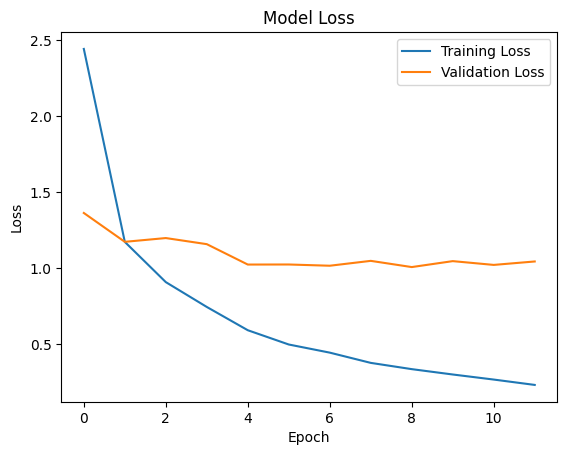

In [25]:
plot_loss(history_VGG)

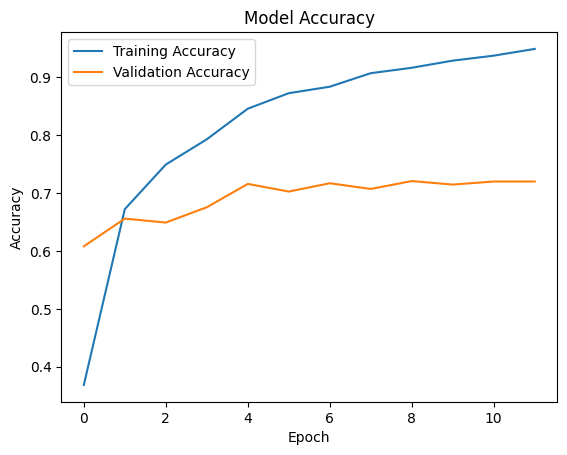

In [26]:
plot_accuracy(history_VGG)

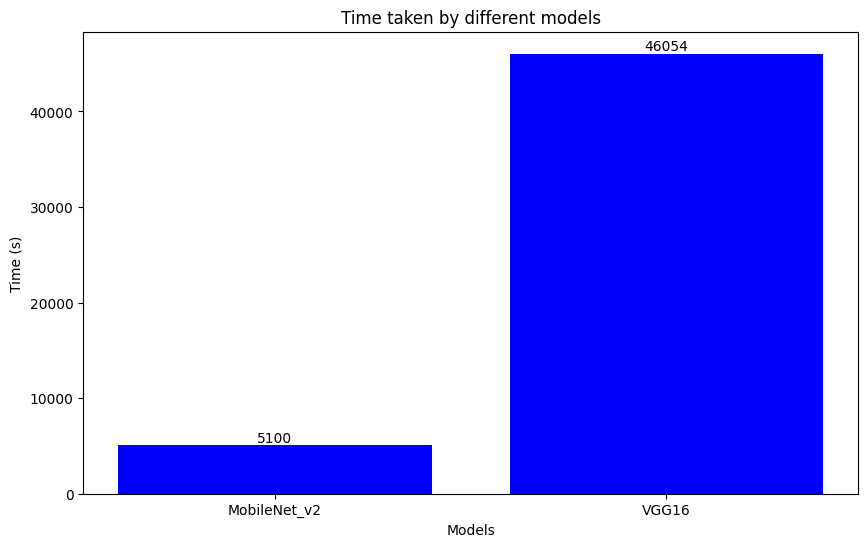

In [3]:
# 767.5696110844613 p
# print(time_vgg_train_minutes)
# time_train_seconds = 150
import matplotlib.pyplot as plt

time_models_best = {
    "MobileNet_v2": 5100,
    "VGG16": 46054,
    }

models = list(time_models_best.keys())
times = list(time_models_best.values())

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(models, times, color='blue')
plt.xlabel('Models')
plt.ylabel('Time (s)')
plt.title('Time taken by different models')

# Thêm giá trị lên đỉnh của cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()